# News Headline Classification with Bert

## Setup Google Drive Environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


## Load the data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
df = shuffle(pd.read_json('/content/drive/My Drive/data/News_Category_Dataset_v2.json', lines=True)).reset_index()
df.head()

,index,category,headline,authors,link,short_description,date
0,20578,POLITICS,Obamacare Repeal Moves Ahead With Key Senate Vote,Jeffrey Young,https://www.huffingtonpost.com/entry/obamacare...,It's still totally unclear just what bill the ...,2017-07-25
1,22048,POLITICS,Guantanamo ‘Freedom Fest’ Features Band Whose ...,Jessica Schulberg,https://www.huffingtonpost.com/entry/guantanam...,Years after the military used Drowning Pool mu...,2017-07-07
2,75295,COMEDY,In the Heights,"Marcia Liss, Contributor(Almost) Famous Cartoo...",https://www.huffingtonpost.com/entry/in-the-he...,,2015-11-08
3,171414,MONEY,"'Cheap' Private Islands For Under $350,000",,https://www.huffingtonpost.com/entry/cheap-pri...,"Just in time for the holiday season, Private I...",2012-12-10
4,167320,WELLNESS,The Voice of Reason: (Maybe Not) for Emergency...,"Susan Weissman, Contributor\nAuthor, ""Feeding ...",https://www.huffingtonpost.com/entry/medical-t...,Imagine if that tiny print on prescription bot...,2013-01-23


### Class labels


In [ ]:
# # clean the labels
# # change CULTURE & ARTS to ARTS & CULTURE
# df['category'] = df['category'].replace('CULTURE & ARTS', 'ARTS & CULTURE')
# # drop rows with THE WORLDPOST
# df = df[df['category'] != 'THE WORLDPOST']
# # drop rows with WORLDPOST
# df = df[df['category'] != 'WORLDPOST']
# # drop rows with QUEER VOICES
# df = df[df['category'] != 'QUEER VOICES']
# # drop rows with BLACK VOICES
# df = df[df['category'] != 'BLACK VOICES']
# # drop rows with LATINO VOICES
# df = df[df['category'] != 'LATINO VOICES']
# # drop rows with IMPACT
# df = df[df['category'] != 'IMPACT']
# # drop rows with WEIRD NEWS
# df = df[df['category'] != 'WEIRD NEWS']
# # drop rows wuth GREEN
# df = df[df['category'] != 'GREEN']
# # drop rows with STYLE
# df = df[df['category'] != 'STYLE']
# # drop rows with TASTE
# df = df[df['category'] != 'TASTE']
# # drop rows with GOOD NEWS
# df = df[df['category'] != 'GOOD NEWS']
# # drop rows with FIFTY
# df = df[df['category'] != 'FIFTY']
# # drop rows with PARENTS
# df = df[df['category'] != 'PARENTS']
# # drop rows with COMEDY
# df = df[df['category'] != 'COMEDY']
# # drop rows with DIVORCE
# df = df[df['category'] != 'DIVORCE']
# #drop rows with HOME & LIVING
# df = df[df['category'] != 'HOME & LIVING']
# # drop rows with WEDDINGS
# df = df[df['category'] != 'WEDDINGS']
# # drop rows with COLLEGE
# df = df[df['category'] != 'COLLEGE']
# # drop rows with WOMEN
# df = df[df['category'] != 'WOMEN']

In [ ]:
label_counts = df['category'].value_counts().rename_axis('labels').reset_index(name='counts')
label_counts

,labels,counts
0,POLITICS,32739
1,WELLNESS,17827
2,ENTERTAINMENT,16058
3,TRAVEL,9887
4,STYLE & BEAUTY,9649
5,PARENTING,8677
6,HEALTHY LIVING,6694
7,QUEER VOICES,6314
8,FOOD & DRINK,6226
9,BUSINESS,5937


In [ ]:
sum(label_counts['counts'].tolist()[:10]) / len(df)

0.5974916979084206

In [ ]:
select_labels = label_counts['labels'].tolist()[:10]
select_labels

['POLITICS',
 'WELLNESS',
 'ENTERTAINMENT',
 'TRAVEL',
 'STYLE & BEAUTY',
 'PARENTING',
 'HEALTHY LIVING',
 'QUEER VOICES',
 'FOOD & DRINK',
 'BUSINESS']

In [ ]:
# select top 10 labels with most counts
df = df[df['category'].isin(select_labels)]

In [ ]:
# code the labels
c = df.category.astype('category')
d = dict(enumerate(c.cat.categories))
print(d)

{0: 'BUSINESS', 1: 'ENTERTAINMENT', 2: 'FOOD & DRINK', 3: 'HEALTHY LIVING', 4: 'PARENTING', 5: 'POLITICS', 6: 'QUEER VOICES', 7: 'STYLE & BEAUTY', 8: 'TRAVEL', 9: 'WELLNESS'}


In [ ]:
df['label'] = df.category.astype('category').cat.codes

In [ ]:
df.head()

,index,category,headline,authors,link,short_description,date,label
0,63279,HEALTHY LIVING,Mark Tuballas' GPS Guide For De-Stressing Befo...,"GPS Guides, The Huffington Post",https://www.huffingtonpost.com/entry/mark-tuba...,Get a good night's rest.,2016-03-23,3
1,22438,POLITICS,Mike Pence: The Servile Schemer Who Would Be P...,"Richard North Patterson, ColumnistColumnist",https://www.huffingtonpost.com/entry/mike-penc...,Previously published on Boston Globe. On the e...,2017-07-03,5
5,52384,POLITICS,Progressive Congressman Warns Against ‘Bernie ...,Laura Barrón-López,https://www.huffingtonpost.com/entry/keith-ell...,"""The Ku Klux Klan thinks Donald Trump would be...",2016-07-26,5
6,124908,POLITICS,What Democrats Must Do to Win in November,"James Zogby, ContributorPresident, Arab Americ...",https://www.huffingtonpost.com/entry/what-demo...,"This November, Democrats will have chance to r...",2014-04-19,5
7,173704,TRAVEL,Finding An Affordable Safari,"Elizabeth Gordon, Contributor\nFounder of Extr...",https://www.huffingtonpost.com/entry/affordabl...,You can get the experience you have seen on Na...,2012-11-15,8


In [ ]:
K = len(set(df['label'].tolist()))
K

10

### Merge headline and short description to form text

In [ ]:
df['text'] = df['headline'] +'. ' +df['short_description']

### Split into train and test set

In [ ]:
# M = 30000  # Colab provides limited GPU time (be mindful when increasing this number) 
df_train, df_test = train_test_split(df, test_size=0.2)
# df_train = df_train.sample(frac=1).reset_index(drop=True)[:int(0.8 * M)]
# df_test = df_test.sample(frac=1).reset_index(drop=True)[:(int(0.2 * M))]

In [ ]:
print(len(df_train), len(df_test))

96006 24002


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fd7fc3190>]],
      dtype=object)

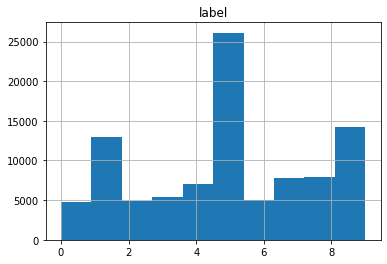

In [ ]:
# Train label distribution
df_train.hist(column='label')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1febcbbd90>]],
      dtype=object)

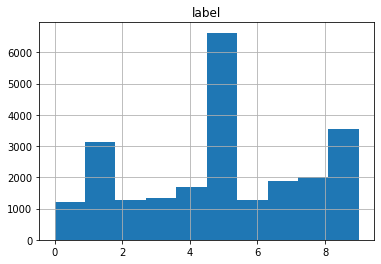

In [ ]:
# Test label distribution
df_test.hist(column='label')

### Text length distribution based on words

In [ ]:
import matplotlib.pyplot as plt

def compute_length(doc):
    """Compute lengths of sentences in a doc."""
    words = doc.split()
    return len(words)

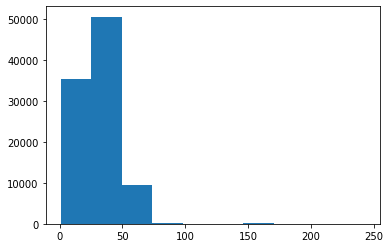

In [ ]:
# Distribution of text length
lengths_train = []
for doc in df_train['text']:
    lengths_train.append(compute_length(doc))

plt.hist(lengths_train)  # train
plt.show()

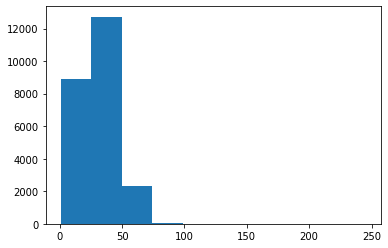

In [ ]:
# Distribution of text length
lengths_test = []
for doc in df_test['text']:
    lengths_test.append(compute_length(doc))

plt.hist(lengths_test)  # test
plt.show()

## Train Bert

This section uses Google CoLab, which provides free (but limited) use of hosted GPU instances..

### Install Packages

In [ ]:
!pip install -q transformers torch

     |████████████████████████████████| 5.8 MB 33.3 MB/s 
     |████████████████████████████████| 7.6 MB 63.5 MB/s 
     |████████████████████████████████| 182 kB 67.5 MB/s 


### Training Hyperparameters

In [ ]:
batch_size = 32
epochs = 2
lr_init = 1e-5
max_len = 128
warmup_steps = 3

### Create batched inputs using Huggingface's BERT tokenizer

In [ ]:
from typing import List, Tuple
import torch
from transformers import BertTokenizerFast
from transformers.tokenization_utils_base import BatchEncoding

tokenizer = BertTokenizerFast.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
def batch_data(data: pd.DataFrame, bsize: int) -> List[Tuple[BatchEncoding, List[int], List[str]]]:
    """
    This Function accepts a Pandas DataFrame and a batch size and returns
    a list of training 'batches', each of which is a tuple of:
        ( X, Y, s )
    where
        X: BatchEncoding ∈ R^(`bsize` x `T_max` x `D`)    inputs
        Y: torch.Tensor ∈ Z^(`bsize` x `1`)               ground truth labels
        s: List[str] w/ len `bsize`                       headlines (i.e., documents)
    """
    result = []
    for i in range(0, len(data), bsize):
        s = data[i : i + bsize]["text"].tolist()  # get the text
        X = tokenizer.batch_encode_plus(batch_text_or_text_pairs = s, truncation=True, padding='max_length', max_length=max_len)  # inputs
        Y = data[i : i + bsize]["label"].tolist()  # ground truth labels
        result.append((X, Y, s))
    return result

In [ ]:
train_batches = batch_data(df_train, bsize=batch_size)
test_batches = batch_data(df_test, bsize=batch_size)

### Load pretrained Bert model

In [ ]:
from tqdm import tqdm
import torch
from transformers import BertForSequenceClassification, \
  AdamW, get_linear_schedule_with_warmup

# Transformer model
model = BertForSequenceClassification.from_pretrained(
    'bert-base-cased', 
    num_labels=K, 
    output_hidden_states=True)

# The torch `device` on which to execute the model computation
if torch.cuda.is_available():
    device = torch.device('cuda:0') # GPU
else:
    device = torch.device('cpu') # CPU
model.to(device)

# The gradient descent optimizer used for fine tuning
optimizer = AdamW(model.parameters(), lr=lr_init)

# The gradient descent learning rate
lr = get_linear_schedule_with_warmup(
    optimizer, num_warmup_steps=warmup_steps, 
    num_training_steps=len(train_batches))

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

### Implement a training loop from scratch

In [ ]:
# !pip install datasets

In [ ]:
from datasets import load_metric

def runner(batches, desc: str, train=True):
    """
    This function accepts a list of batches (i.e., the output of batch_data())
    and returns a tuple consisting of:
        (predictions, cls-embeddings, mean-loss, accuracy, f1-score)
    where
        preditions: List[pred for each input]
        cls-embeddings: List[bert's cls embeddings for each input]
        mean-loss: mean loss computed over data in batches
        mean-accuracy: mean accuracy computed over data in batches
        mean-f1-score: mean f1 score computed over data in batches
    """
    grad_mode = torch.enable_grad if train else torch.no_grad
    preds = []

    mean_loss = []
    mean_accuracy = []
    mean_f1_score = []

    if train:
        model.train()
    else:
        model.eval()

    for epoch in range(epochs if train else 1):
        
        acc = load_metric("accuracy", keep_in_memory=True)
        f1 = load_metric("f1", keep_in_memory=True)
        cumloss = 0.0
        embeds = []
        
        with tqdm(total=len(batches)) as bar:

            for i, batch in enumerate(batches):
                X, Y, _ = batch
                inputs = torch.tensor(X['input_ids'], device=device)
                attmsk = torch.tensor(X['attention_mask'], device=device)
                labels = torch.tensor(Y, device=device)
                batch = {'input_ids': inputs,
                         'attention_mask': attmsk,
                         'labels': labels}
                with grad_mode():
                    outputs = model(**batch)
                    embeds.append(outputs[-1][1][:, 0, :].squeeze().detach().cpu())  # only take CLS tokens
                    loss = outputs.loss
                    if train:
                        loss.backward()  # Back Propagation
                        optimizer.step()  # update optimizer (Gardient Descent)
                        lr.step()  # update learning rate
                        optimizer.zero_grad()  # clears old gradients from the last step
                    logits = outputs.logits
                    Yhat = torch.argmax(logits, dim=-1) # perform on last dimension
                    preds.append(Yhat)
                    cumloss += loss.clone().detach().cpu().item()
                    acc.add_batch(predictions=Yhat, references=Y)
                    f1.add_batch(predictions=Yhat, references=Y)

                bar.update(1)

            epoch_mean_loss = cumloss / (i + 1)
            epoch_mean_accuracy = acc.compute()['accuracy']
            epoch_mean_f1 = f1.compute(average="macro")['f1']
                
            bar.set_description('epoch: %s, %s loss: %.3f, f1-score: %.3f, accuracy: %.3f' %
                                (epoch + 1, desc,
                                 epoch_mean_loss,
                                 epoch_mean_f1,
                                 epoch_mean_accuracy))

            mean_loss.append(epoch_mean_loss)
            mean_accuracy.append(epoch_mean_accuracy)
            mean_f1_score.append(epoch_mean_f1)
     
    embeds = torch.cat(embeds, dim=0)

    results = (preds, embeds, mean_loss, mean_accuracy, mean_f1_score)
        
    return results

In [ ]:
# Train model
preds, embeds, mean_loss, accuracy, f1_score = runner(train_batches, 'train', train=True)

<ipython-input-27-baf702e36b92>:29: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  acc = load_metric("accuracy", keep_in_memory=True)


epoch: 1, train loss: 0.618, f1-score: 0.765, accuracy: 0.812: 100%|██████████| 3001/3001 [32:04<00:00,  1.56it/s]
epoch: 2, train loss: 0.430, f1-score: 0.834, accuracy: 0.869: 100%|██████████| 3001/3001 [32:01<00:00,  1.56it/s]


In [ ]:
# Evaluate the model on train set
preds, embeds, mean_loss, accuracy, f1_score = runner(train_batches, 'train', train=False)

epoch: 1, train loss: 0.397, f1-score: 0.845, accuracy: 0.878: 100%|██████████| 3001/3001 [11:34<00:00,  4.32it/s]


In [ ]:
# Evaluate the model on test set
preds, embeds, mean_loss, accuracy, f1_score = runner(test_batches, 'test', train=False)

epoch: 1, test loss: 0.463, f1-score: 0.817, accuracy: 0.854: 100%|██████████| 751/751 [02:53<00:00,  4.32it/s]
